In [3]:
!pip install matplotlib

     |████████████████████████████████| 9.2 MB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 11.6 MB/s eta 0:00:01
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
     |████████████████████████████████| 1.2 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 31.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 81.7 MB/s eta 0:00:01


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Building a Pivot Table Using Pandas

In [15]:
# using a single index or row

table = pd.pivot_table(data=df, index=['Sex'], values=['Age','Fare','Parch','Pclass','SibSp','Survived'])
table

,Age,Fare,Parch,Pclass,SibSp,Survived
Sex,,,,,,
female,27.915709,44.479818,0.649682,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,2.389948,0.429809,0.188908


<Axes: xlabel='Sex'>

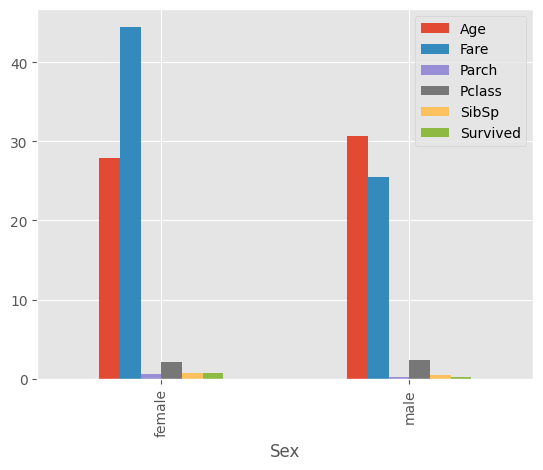

In [16]:
%matplotlib inline
import numpy as np
table.plot.bar()

How to Run a Pivot With a Multi-Index?

In [22]:
# multiple index or multiple rows

table = pd.pivot_table(data=df, index=['Sex', 'Pclass'], values=['Age','Fare','Parch','SibSp','Survived'])
table

Age        Fare     Parch     SibSp  Survived
Sex    Pclass                                                     
female 1       34.611765  106.125798  0.457447  0.553191  0.968085
       2       28.722973   21.970121  0.605263  0.486842  0.921053
       3       21.750000   16.118810  0.798611  0.895833  0.500000
male   1       41.281386   67.226127  0.278689  0.311475  0.368852
       2       30.740707   19.741782  0.222222  0.342593  0.157407
       3       26.507589   12.661633  0.224784  0.498559  0.135447

<Axes: xlabel='Sex,Pclass'>

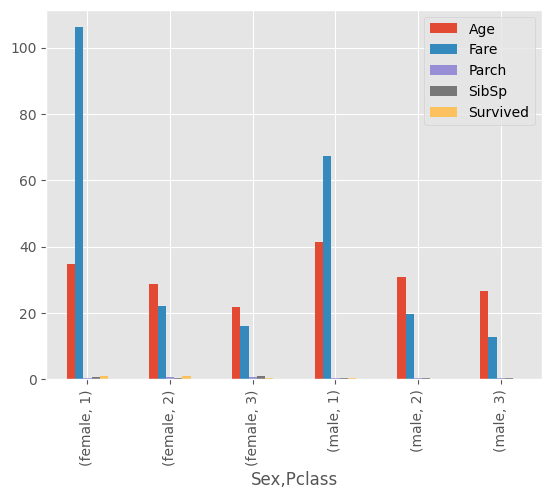

In [23]:
%matplotlib inline
import numpy as np
table.plot.bar()

## Different Aggregation Functions for Different Features

The values shown in the table are the result of the summarization that aggfunc applies to the feature data. aggfunc is an aggregate function that pivot_table applies to your grouped data.

By default, it is np.mean(), but you can use different aggregate functions for different features too! Just provide a dictionary as an input to the aggfunc parameter with the feature name as the key and the corresponding aggregate function as the value.

I will be using np.mean() to calculate the mean for the ‘Age’ feature and np.sum() to calculate the total survivors for the ‘Survived’ feature:

In [24]:
#different aggregate functions
table = pd.pivot_table(df,
                       index=['Sex','Pclass'], 
                       values=['Age','Fare','Parch','SibSp','Survived'],
                       aggfunc={'Age':np.mean,'Survived':np.sum})
table

Age  Survived
Sex    Pclass                     
female 1       34.611765        91
       2       28.722973        70
       3       21.750000        72
male   1       41.281386        45
       2       30.740707        17
       3       26.507589        47

<Axes: xlabel='Sex,Pclass'>

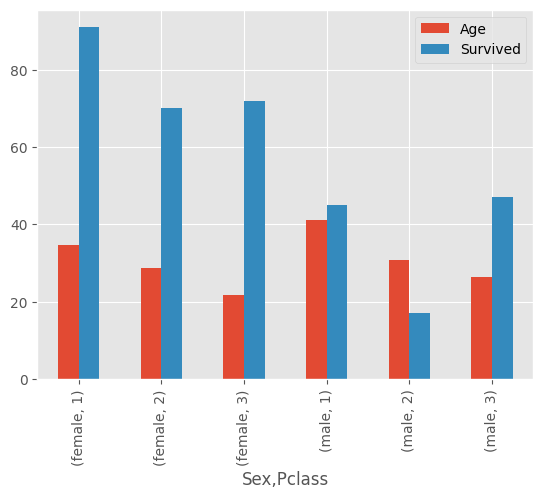

In [25]:
table.plot(kind='bar')

## Aggregate on Specific Features With Values Parameter

In [26]:
table = pd.pivot_table(
    df,
    index=['Sex','Pclass'],
    values=['Survived'], 
    aggfunc=np.mean
    )
table

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

<Axes: xlabel='Sex,Pclass'>

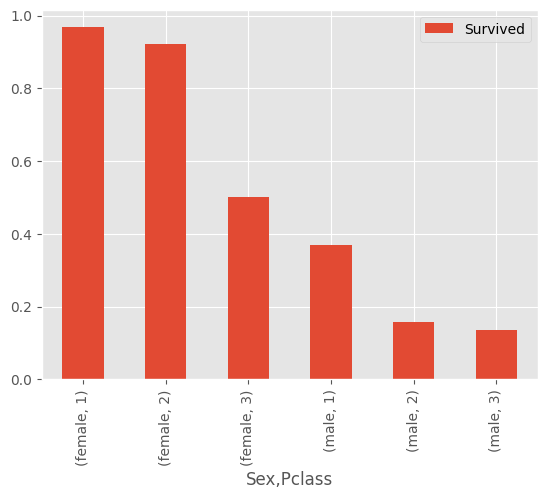

In [27]:
table.plot(kind='bar')